<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/vitalfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vital 파일 다루기
Vital Recorder 에서 생성한 Vital 파일을 파이선으로 읽어오는 방법을 알아보겠습니다.

## 샘플 vital 파일 다운로드
아래 코드를 실행하여 vitaldb 의 샘플 vital 파일을 다운로드 합니다.

In [ ]:
!wget https://vitaldb.net/samples/00001.vital

## Vital 파일을 읽기 위한 라이브러리 다운로드

github에 공개된 vitalutils 코드 중 vital 파일을 읽기 위한 vitaldb 모듈을 읽어옵니다.

In [14]:
!wget https://raw.githubusercontent.com/vitaldb/vitalutils/master/python/vitaldb.py

--2020-09-11 23:17:49--  https://raw.githubusercontent.com/vitaldb/vitalutils/master/python/vitaldb.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14492 (14K) [text/plain]
Saving to: ‘vitaldb.py’

vitaldb.py          100%[===================>]  14.15K  --.-KB/s    in 0.01s   

2020-09-11 23:17:50 (1.15 MB/s) - ‘vitaldb.py’ saved [14492/14492]



## Vital 파일 트랙 목록 읽기
vital_trks 함수를 사용하여 개인이 보유한 vital 파일을 내용을 읽습니다. 본 예제에서는 위에서 다운로드 한 00001.vital 파일을 읽어보겠습니다.

In [16]:
import vitaldb

trks = vitaldb.vital_trks("00001.vital")
trks

AttributeError: ignored

## Vital 파일 내용 읽기
vital_recs 함수를 사용하여 개인이 보유한 vital 파일을 내용을 읽습니다. 본 예제에서는 위에서 다운로드 한 00001.vital 파일을 읽어보겠습니다.

어떤 트랙을 읽을지, 한 행은 몇 초 간격으로 읽을지를 지정해야합니다. 트랙 목록을 지정할 때는 `장비명1/트랙명1,장비명2/트랙명2` 형태로 합니다.

[[       nan        nan]
 [       nan        nan]
 [       nan        nan]
 ...
 [5.14542543        nan]
 [5.14542543        nan]
 [5.14542543        nan]]
[       nan        nan        nan ... 5.14542543 5.14542543 5.14542543]
[-0.2        -0.2        -0.2        -0.40000001 -0.40000001 -0.40000001]


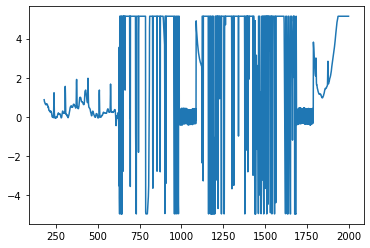

In [ ]:
import numpy as np
import vitaldb

vals = vitaldb.load_vital("00001.vital", 'SNUADC/ECG_II,Solar 8000M/ST_II', 0.01)
vals = vals[:2000, :]
print(vals)

ecg = vals[:,0]
print(ecg)

st = vals[:,1]
st_valid = st[~np.isnan(st)]
print(st_valid)

import matplotlib.pyplot as plt
plt.plot(np.arange(len(ecg)), ecg)
plt.plot(np.arange(len(st)), st)
plt.show()